In [1]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, \
roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

class Statistics:
    def __init__(self):
        self.y_pred = []
        self.y_true = []
        self.balanced_accuracy = dict()
        self.list_experiment = []

        self.current_experiment_name = ""
        self.list_experiment = []
        self.param = dict()
        self.confusion_matrix = [[0,0],[0,0]]
        self.roc_area = dict()
        self.report = ""
        self.batch_count = dict()
        self.epoch_count = dict()


    
    ############# Entrées #############
    
    def new_experiment(self, name, parameters):
        self.current_experiment_name = "{} ".format(len(self.list_experiment)) + name
        self.list_experiment.append(self.current_experiment_name)
        self.param[self.current_experiment_name] = parameters

        self.balanced_accuracy[self.current_experiment_name] = []
        self.roc_area[self.current_experiment_name] = []
        self.batch_count[self.current_experiment_name] = 0
        self.epoch_count[self.current_experiment_name] = 0
        self.y_pred = []
        self.y_true = []

    
    def new_epoch(self):
        self.epoch_count[self.current_experiment_name] += 1
        
    def add_batch_results(self, batch_pred, batch_true):
        if self.epoch_count[self.current_experiment_name] == 1:
            self.batch_count[self.current_experiment_name] += 1
        self.y_pred.extend(batch_pred)
        self.y_true.extend(batch_true)
        new_accuracy = balanced_accuracy_score(self.y_pred, self.y_true)
        self.balanced_accuracy[self.current_experiment_name].append(new_accuracy)
        self.roc_area[self.current_experiment_name].append(roc_auc_score(self.y_pred, self.y_true))

    def end_epoch(self):
        self.confusion_matrix = confusion_matrix(self.y_pred, self.y_true)
        self.report = classification_report(self.y_pred, self.y_true)
        self.y_pred = []
        self.y_true = []
        self.iteration = 0

    ############# Sorties #############

    
    def save(self, file_path): # à appeler à la toute fin
        return
    
    def print_results(self): # à appeler à chaque fin d'epoch
        self.end_epoch()
        print("Balanced accuracy score: {}".format(self.balanced_accuracy[self.current_experiment_name][-1]))
        print("Confusion matrix:\n {}".format(self.confusion_matrix))
        print("Curve ROC area: {}".format(self.roc_area))
        print(self.report)
    
    
    def plot(self):
        print(self.batch_count)
        print(self.epoch_count)
        fig, ax1 = plt.subplots(1,1,figsize=(5,3),dpi=100)
        ax1.plot(self.balanced_accuracy[self.current_experiment_name], )
        #ax1.set_xlim((self.balanced_accuracy[self.current_experiment_name][0],self.balanced_accuracy[self.current_experiment_name][-1]))
        print(self.balanced_accuracy[self.current_experiment_name])
        xticklabs = ["{}".format(i) for i in range(self.epoch_count[self.current_experiment_name] * self.batch_count[self.current_experiment_name])]
        for i in range(self.epoch_count[self.current_experiment_name]):
            xticklabs[i * self.batch_count[self.current_experiment_name] - 1] = "Epoch {}".format(i) #r'$\textcolor{{red}}{{Epoch {}}}$'
        xticklabs[-1] = "Epoch {}".format(self.epoch_count[self.current_experiment_name])
        ax1.set_xticklabels(xticklabs)
        print(xticklabs)
        ax1.xaxis.set_minor_locator(MultipleLocator)
        #for i in range(self.epoch_count):
             #, data=(np.array([j for j in range(3)]),np.array([j for j in range(3)])
            #plt.title('Epoch {}'.format(self.iteration))
            #plt.axvline(x=i*self.epoch_count,color='red')
        #plt.show()
        fig.tight_layout()
        return
    
# ~ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# ~ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# ~ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
# ~ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# ~ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

# ~ Plusieurs experiences
  # ~ pour chaque experience
    # ~ plusieurs fonction de test (une par epoch d'entrainement)
      # ~ pour chaque test tu as plusieurs résultats de batch
        # ~ toi tu reçois les résultats d'un batch 

Balanced accuracy score: 0.775
Confusion matrix:
 [[40 10]
 [10 30]]
Curve ROC area: {'0 loremipsum': [0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875], '1 alive': [0.7750000000000001, 0.7750000000000001, 0.7750000000000001, 0.7750000000000001, 0.7750000000000001, 0.7750000000000001, 0.7750000000000001, 0.7750000000000001, 0.7750000000000001, 0.7750000000000001]}
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        50
           1       0.75      0.75      0.75        40

   micro avg       0.78      0.78      0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90

{'0 loremipsum': 5, '1 alive': 10}
{'0 loremipsum': 3, '1 alive': 1}
[0.775, 0.775, 0.775, 0.775, 0.775, 0.775, 0.775, 0.775, 0.775, 0.775]
['0', '1', '2', '3', '4', '5', '6', '7', '8', 'Epoch 1']


NameError: name 'MultipleLocator' is not defined

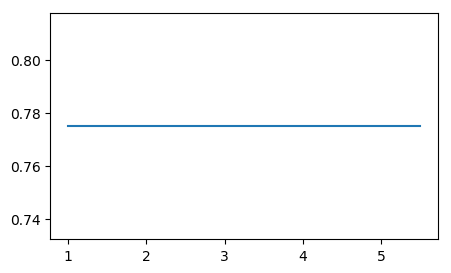

In [2]:
stat=Statistics()
pred=[0,0,0,0,1]
real=[1,0,0,0,1]
stat.new_experiment("loremipsum",{"batch_size" : 64, "lambda" : 17})
for e in range(3):
    stat.new_epoch()
    for b in range(5):
        stat.add_batch_results(pred,real)
pred=[0,0,0,0,1,0,1,1,1]
real=[1,0,0,0,1,0,1,0,1]
stat.new_experiment("alive",{"batch_size" : 64, "beta" : 17})
for e in range(1):
    stat.new_epoch()
    for b in range(10):
        stat.add_batch_results(pred,real)

stat.print_results()
stat.plot()

In [9]:
balanced_accuracy_score(pred,real)

0.775

In [18]:
roc_auc_score(pred,real)

0.7750000000000001

In [164]:
print(classification_report(pred,real))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         1

   micro avg       0.80      0.80      0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



In [165]:
d2 = dict()

In [166]:
d2['a'].append(7)

KeyError: 'a'

In [213]:
print(d)

{'a': [7]}
[1, 6]


In [225]:
print(roc_curve(pred,real))

(array([0.  , 0.25, 1.  ]), array([0., 1., 1.]), array([2, 1, 0]))


In [10]:
l=[1,2]
l.extend(l)
print(l)
print(3 in l)
print(2 in [])
print("abcd" == "abc" + "d")

[1, 2, 1, 2]
False
False
True


NameError: name 'xticklabs1' is not defined

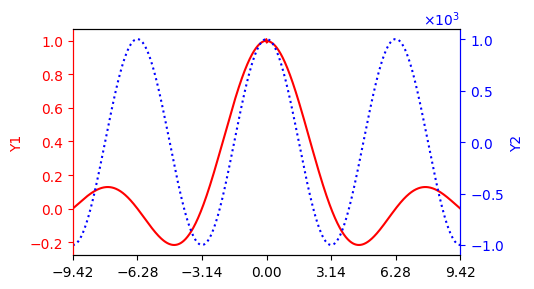

In [381]:
fig, ax1 = plt.subplots(1,1,figsize=(5,3),dpi=100)

X = np.linspace(-3*np.pi,3*np.pi,1000)
Y1 = np.sin(X)/(X+0.0001)
Y2 = 1e3 * np.cos(X)
Y3 =  np.exp(np.abs(X))

# Twin the axis
ax2 = ax1.twinx()

# Plotting
ax1.plot(X,Y1,'-r')
ax2.plot(X,Y2,':b')

# Color the axis and add labels
ax1.set_ylabel('Y1',color='r')
ax2.set_ylabel('Y2',color='b')

ax1.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')

# Set the spine colors. Really only need to do ax2 since that is on top
# but this just makes 100% sure
for ax in (ax1,ax2):
    ax.spines['left'].set_color('r')
    ax.spines['right'].set_color('b')

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_color('b') # Set the color of the power

# Better X-Ticks
ax1.set_xlim((X.min(),X.max()))
ax1.set_xticks(np.arange(-3,4)*np.pi)
xticklabs = [r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4)]; xticklabs[3]='0'
xticklabs2 = ["{}".format(i) for i in range(10)]
for i in range(10):
    if i%5 == 0:
        xticklabs2[i] = "Epoch {}".format(i//5) #r'$\textcolor{{red}}{{Epoch {}}}$'
ax1.set_xticklabels(xticklabs1) 

fig.tight_layout()

In [320]:
xticklabs = ["{}".format(i) for i in range(10)]
for i in range(10):
    if i%5 == 0:
        xticklabs[i] = r'$Epoch{}$'.format(i//2)

In [13]:
l1 = []
l2 = list(l1)
l1.append(7)
print(l1 , l2)

[7] []


In [35]:
[ r'$\mathregular{{{0:d}\pi}}$'.format(i) for i in np.arange(-3,4) ]

['$\\mathregular{-3\\pi}$',
 '$\\mathregular{-2\\pi}$',
 '$\\mathregular{-1\\pi}$',
 '$\\mathregular{0\\pi}$',
 '$\\mathregular{1\\pi}$',
 '$\\mathregular{2\\pi}$',
 '$\\mathregular{3\\pi}$']

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, \
roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
# import ../utils/statistics
import statistics

def new_exp1(st):
    st.new_experiment("loremipsum", {"batch_size": 64, "lambda": 17})
    n = "{} ".format(len(st.list_experiment) - 1) + "loremipsum"
    assert st.current_experiment_name == n
    assert st.list_experiment[-1] == n
    assert st.param[n] == {"batch_size": 64, "lambda": 17}
    assert st.balanced_accuracy[n] == []
    assert st.roc_area[n] == []
    assert st.batch_count[n] == 0
    assert st.epoch_count[n] == 0
    
def new_ep(st):
    past_epoch_count = st.epoch_count[st.current_experiment_name]
    st.new_epoch()
    assert st.epoch_count[st.current_experiment_name] == past_epoch_count + 1
        
def add_b1(st):
    pred = [0,0,0,0,1]
    real = [1,0,0,0,1]
    past_number_batch = st.batch_count[st.current_experiment_name]
    past_y_pred = list(st.y_pred)
    past_y_real = list(st.y_true)
    st.add_batch_results(pred,real)
    assert st.epoch_count[st.current_experiment_name] > 0
    if st.epoch_count[st.current_experiment_name] == 1:
        assert st.batch_count[st.current_experiment_name] == past_number_batch + 1
    else:
        assert st.batch_count[st.current_experiment_name] == past_number_batch
    assert st.y_pred == past_y_pred + pred
    assert st.y_true == past_y_real + real
    #print(len(st.balanced_accuracy[st.current_experiment_name]), st.epoch_count[st.current_experiment_name], st.batch_count[st.current_experiment_name])
    #assert len(st.balanced_accuracy[st.current_experiment_name]) == (st.epoch_count[st.current_experiment_name] - 1) * st.batch_count[st.current_experiment_name] + st.batch_count[st.current_experiment_name]
    #assert len(st.roc_area[st.current_experiment_name]) == (st.epoch_count[st.current_experiment_name] - 1) * st.batch_count[st.current_experiment_name] + st.batch_count[st.current_experiment_name]
    assert st.balanced_accuracy[st.current_experiment_name][-1] == 0.875
    assert st.roc_area[st.current_experiment_name][-1] == 0.875
    
def new_exp2(st):
    st.new_experiment("alive", {"batch_size": 64, "beta": 17})
    n = "{} ".format(len(st.list_experiment) - 1) + "alive"
    assert st.current_experiment_name == n
    assert st.list_experiment[-1] == n
    assert st.param[n] == {"batch_size": 64, "beta": 17}
    assert st.balanced_accuracy[n] == []
    assert st.roc_area[n] == []
    assert st.batch_count[n] == 0
    assert st.epoch_count[n] == 0

        
def add_b2(st):
    pred = [0,0,0,0,1,0,1,1,1]
    real = [1,0,0,0,1,0,1,0,1]
    past_number_batch = st.batch_count[st.current_experiment_name]
    past_y_pred = list(st.y_pred)
    past_y_real = list(st.y_true)
    st.add_batch_results(pred,real)
    assert st.epoch_count[st.current_experiment_name] > 0
    if st.epoch_count[st.current_experiment_name] == 1:
        assert st.batch_count[st.current_experiment_name] == past_number_batch + 1
    else:
        assert st.batch_count[st.current_experiment_name] == past_number_batch
    assert st.y_pred == past_y_pred + pred
    assert st.y_true == past_y_real + real
    #assert len(st.balanced_accuracy[st.current_experiment_name]) == (st.epoch_count[st.current_experiment_name] - 1) * st.batch_count + st.batch_count
    #assert len(st.roc_area[st.current_experiment_name]) == (st.epoch_count - 1) * st.batch_count + st.batch_count
    assert st.balanced_accuracy[st.current_experiment_name][-1] == 0.775
    assert st.roc_area[st.current_experiment_name][-1] == 0.7750000000000001
    
def main():
    stat = Statistics()
    new_exp1(stat)
    for e in range(3):
        new_ep(stat)
        for b in range(5):
            add_b1(stat)
    new_exp2(stat)
    for e in range(1):
        new_ep(stat)
        for b in range(10):
            add_b2(stat)

if __name__ == '__main__':
    main()